In [0]:
import pandas as pd

In [32]:
# Lendo o arquivo de filmes
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

# Exibição das primeiras linhas do arquivo
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
# Lendo o arquivo de avaliações
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Desafio 1 - Listar os filmes sem avaliações


In [0]:
# Faço uma listagem de media por filme
notas_media_por_filme = avaliacoes.groupby("movieId")["rating"].mean()

# Adiciono a coluna da nota média pelo 'Id' do filme
filmes_com_media = filmes.join(notas_media_por_filme, on="movieId")

In [17]:
# Jeitos diferentes para a mesma solução
# se o filme nao tem avaliação, a sua nota vai ser nula

# solucao - 1
# filmes_com_media.query('rating.isnull()', engine='python')

# solução - 2
selecao = filmes_com_media['rating'].isnull()
filmes_com_media[selecao]

,movieId,title,genres,rating
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# Desafio 2 - Renomear coluna

In [18]:
# solucao - 1 (alteração feita com base no index)
filmes_com_media.columns.values[3] = "nota_média"

# solucao - 2 (alteração feita com base no nome da coluna)
filmes_com_media = filmes_com_media.rename(columns={'nota': 'nota_media'})
filmes_com_media.head()

,movieId,title,genres,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 3 - Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.


In [20]:
total_votos_por_filme = avaliacoes.groupby("movieId")["rating"].count()
total_votos_por_filme.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: rating, dtype: int64

# Desafio 4 - Arredondar as médias (coluna de nota média) para duas casas decimais.

In [22]:
notas_media_por_filme = avaliacoes.groupby("movieId")["rating"].mean().round(2)
notas_media_por_filme.head()

movieId
1    3.92
2    3.43
3    3.26
4    2.36
5    3.07
Name: rating, dtype: float64

# Desafio 5 - Descobrir os generos dos filmes (quais são eles, únicos).

In [0]:
# Jeito manual - sem utilizar o pandas
lista_generos_unicos = []

# Faco um loop em cada linha do array
for index, row in filmes.iterrows():
  # Vou na 3 coluna da linha e faço a quebra da string utilizando o separador | 
  categorias = row[2].split("|")
  # Percorro as categorias
  for categoria in categorias:
    # Se a categoria em questão já não estiver na lista
    if categoria not in lista_generos_unicos:
      # Adiciono na lista
      lista_generos_unicos.append(categoria)

#print (lista_generos_unicos)

In [24]:
# Utilizando o pandas
generos_unicos = filmes_com_media.genres.str.get_dummies('|')
generos = generos_unicos.columns.to_list()
generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

# Desafio 6 - Contar o número de aparições de cada genero.

In [27]:
total_por_genero = filmes_com_media.genres.str.get_dummies().sum()
total_por_genero

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

# Desafio 7 - Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

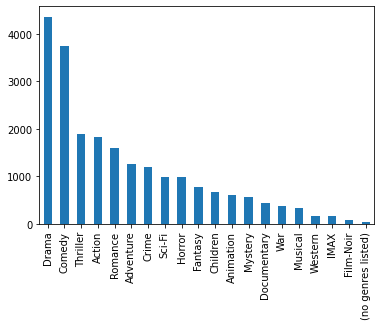

In [30]:
total_por_genero.sort_values(ascending=False).plot(kind='bar')